In [ ]:
!nvidia-smi

#Regresyon
Regresyon, bir bağımlı değişken ile diğer birkaç bağımsız değişken arasındaki ilişkiyi belirler. Regresyon analizi, bazı bağımsız değişkenler değiştiğinde bağımlı değişkenin nasıl değiştiğini anlamaya yardımcı olur.

Regresyon, değişkenler arasındaki neden-sonuç ilişkisini tahmin etmek ve bulmak için kullanılır. Regresyon teknikleri çoğunlukla bağımsız değişkenlerin sayısı ve bağımsız ve bağımlı değişkenler arasındaki ilişkinin türü bakımından farklılık gösterir ve tahminlerde bulunmak için çeşitli regresyon teknikleri mevcuttur.


#Lineer Regresyon
https://python.plainenglish.io/understanding-and-implementing-linear-regression-from-scratch-cc775ffd9746
* Basit Doğrusal Regresyon
* Çoklu Doğrusal Regresyon

**Basit doğrusal regresyon**, iki sürekli (nicel) değişken arasındaki ilişkileri özetlememizi ve incelememizi sağlayan istatistiksel bir yöntemdir: X ile gösterilen değişkenlerden biri tahmin edici, açıklayıcı veya bağımsız değişken olarak kabul edilir.
Y ile gösterilen diğer değişken ise yanıt, sonuç veya bağımlı değişken olarak kabul edilir. Daha fazla bilgi için: https://online.stat.psu.edu/stat462/node/93/

Basitçe çoklu regresyon olarak da bilinen **Çoklu Doğrusal Regresyon**, bir yanıt değişkeninin sonucunu tahmin etmek için birkaç açıklayıcı değişken kullanan istatistiksel bir tekniktir. Çoklu doğrusal regresyonun amacı, açıklayıcı (bağımsız) değişkenler ile yanıt (bağımlı) değişkenler arasındaki doğrusal ilişkiyi modellemektir.

y = b0 + b1 * x1 + b2 * x2 + … + bn * xn

Burada:

**y** bağımlı değişkenin tahmin edilen veya açıklanan değeridir.
**b0** tüm bağımsız değişkenlerin (x1, x2, ..., xn) değerlerinin sıfır olması durumunda y'nin alacağı başlangıç noktasıdır.
**b1, b2, ..., bn** bağımsız değişkenlerin katsayıları veya ağırlıklarıdır ve değişkenler arasındaki ilişkinin gücünü ve yönünü belirler.
**x1, x2, ..., xn** bağımlı değişkeni tahmin etmek veya açıklamak için kullanılan bağımsız değişkenlerdir.



In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Veri Seti Açıklama ve Örnek
###Diabets Veri Kümesi
Daibets Veri Kümesinde **yaş**, **cinsiyet**, **vücut** **kitle indeksi**, **ortalama kan basıncı** ve **altı kan serumu ölçümü** olmak üzere on temel değişken bulunmaktadır. Özellikler, n = 442 diyabet hastasının her biri için ve ayrıca başlangıçtan bir yıl sonra hastalığın ilerlemesinin nicel bir ölçüsü olan ilgilenilen yanıt için elde edilmiştir.
Bu veri seti hakkında daha fazla bilgi için: https://rowannicholls.github.io/python/data/sklearn_datasets/diabetes.html

In [2]:
diabetes = load_diabetes()
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [3]:
#Diabets veri kümesinin açıklamasını yazdır
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
print(diabetes.data.shape) #veriseti boyutu
print(diabetes.feature_names) #ver seti özellik isimleri

(442, 10)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [5]:

db = pd.DataFrame(diabetes.data)
db.columns = diabetes.feature_names
db.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
db['DB'] = diabetes.target  #hedef sütun DB oluştur
db.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DB
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


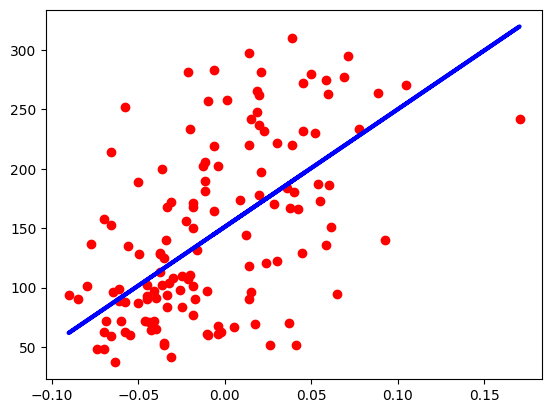

In [8]:
#veri-görselleştirme

X = diabetes.data[:, np.newaxis, 2] #one feature selected for visualization
y= diabetes.target
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(train_x,train_y)
y_pred = model.predict(test_x)

# Plot the results
plt.scatter(test_x, test_y, color='red', label='Actual')
plt.plot(test_x, y_pred, color='blue', linewidth=3, label='Linear Regression')

In [9]:
# Eğitim-Test Bölme
X = diabetes.data
y= diabetes.target

train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=42)

train_x.shape, train_y.shape

((309, 10), (309,))

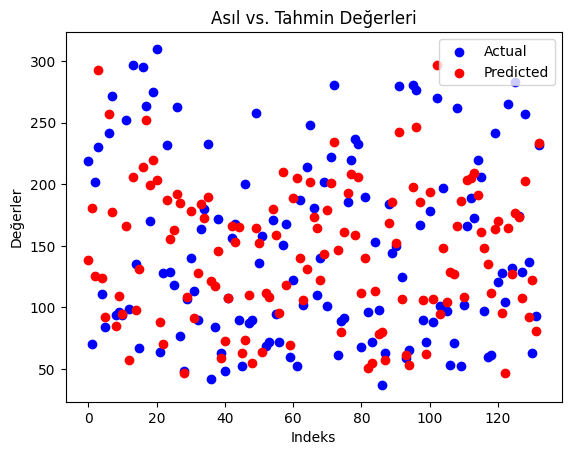

In [10]:
# Lineer Regresyon
model = LinearRegression()

model.fit(train_x,train_y)
y_pred = model.predict(test_x)

result = pd.DataFrame({'Asıl': test_y, 'Tahmin': y_pred})

#Plot
plt.scatter(result.index, result['Asıl'], color='blue', label='Actual')
plt.scatter(result.index, result['Tahmin'], color='red', label='Predicted')

plt.title('Asıl vs. Tahmin Değerleri')
plt.xlabel('Indeks')
plt.ylabel('Değerler')
plt.legend()
plt.show()


In [11]:
print('coefficient', model.coef_)
print('intercept', model.intercept_)

coefficient [  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]
intercept 151.00821291456543


Daha fazla bilgi için: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb